In [1]:
# Einstellungen fuer Plots

imagewidth = 800
plot_size = (18, 10)
half_plot_size = (18, 6)

In [2]:
%matplotlib inline
import numpy as np
np.random.seed(42)
import pandas as pd
import seaborn as sns
import math
from math import log 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

In [3]:
# Change style according to FH
import matplotlib.pyplot as plt
plt.style.use('img/fh_kiel.mplstyle')
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from palettable.colorbrewer.qualitative import Paired_8 as q_map



plt.set_cmap(q_map.mpl_colormap)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

blue = '#30414D'
green = '#006A4D'
orange = '#E3AB44'
dark_red = '#C55024'
alarm_red = '#E20020'
light_green = '#7AB51D'

cmap_kiel = ListedColormap(['#30414D', '#E3AB44', '#C55024'])
cmap_kiel2 = ListedColormap(['#30414D', '#E3AB44']);

<Figure size 432x288 with 0 Axes>

# Grundlagen Maschinelles Lernen

## Fundamentals of Machine Learning



Prof. Dr.-Ing. Daniel Böhnke

<div style="text-align: right"> Woche 10, v1 </div>

# CRISP-DM


<table style='background:white'><tr style='background:white'><td style='background:white'><img src="img/pdm.png" class="stretch"></td><td style='background:white'><img src="img/CRISP-DM_Process.png" class="stretch"></td></tr></table>

* CRISP-DM ist einer der Standard-Prozesse für Data Mining.
* Des Weiteren existieren spezialisierte Prozessmodell für DM. z.B. Predictive Maintenance
* 2015 wurde von IBM auch ein Nachfolger mit dem Namen ASUM-DM vorgestellt. Dieser scheint aber nicht die gleiche Verbreitung zu haben. 

## Hyperparameter Tuning vs. Feature Engineering 


<center><img src="img/tafel_fe.png" width=30% class="stretch"></center>

* Im Feature Engineering manipulieren wir $X$, um es dem Modell einfach zu machen
* Im Hyperparameter Tuning passen wir die Stellschrauben von $f(x)$ an, um das Modell besser zu machen
* z.B. verändern wir die Anzahl der Nachbarn bei einer KNN Klassifizierung

# Blackbox

<center><img src="img/tafel_bb.png" width=30% class="stretch"></center>

* Wir kennen in der Regel weder die Definition der Zielfunktion noch der Randbedingung
* Selbst wenn, sind wir oft nicht in der Lage eine analytische Lösung zu finden
* D.h. Wir kennen die Formel nicht
* D.h. Wir können $V$ nicht in $O$ einsetzen, sondern gehen davon aus, dass sie Ergebnis der Blackbox sind

# Vergleich über Histogramm

<center><img src="img/hist.png" width=50% class="stretch"></center>

* Vergleich der Designs über ein Histogramm
* In den 16 Bins werden alle Punkte einsortiert
* Desto mehr Punkte in eine Bin fallen, desto schwächer sind sie verteilt





# Heute

* Aus dem Bereich der *klassischen*, symbolischen ML Modelle wird heute die Support Vektor Machine (SVM) eingeführt.
* SVMs können (wie Entscheindungsbäume) für Klassifikation und Regression eingesetzt werden. 
* Durch den Kernel Trick sind sie sehr mächtige Algorithmen. 

# Lernlandkarte 
<center><img src="img/lernlandkarte.png" width=80% class="stretch"></center>

# Motivation Hyperebene

<center><img src="img/svm_motivation.png" width=30% class="stretch"></center>

* Sie haben die folgenden Daten gegeben!
* Wie können Sie eine Gerade nutzen, um hier eine Klassifikation umzusetzen?
* Welche Gerade würden Sie wählen?

In [4]:
n1, n2, dim = 500,500, 2
np.random.seed(0)
C = np.array([[0., -0.23], [0.5, .23]])
X = np.r_[np.dot(np.random.randn(n1, dim), C) + np.array([1, 1]),
          np.dot(np.random.randn(n2, dim), C) + np.array([2, 2])]
y = np.hstack((np.ones(n1)*-1, np.ones(n2)))
df = pd.DataFrame({'Strom':X[:,0],'Spannung':X[:,1], 'Zustand':y})
df_elektro = df.copy()

# Beispiel Elektromotor

* Wir messen Strom und Spannung für den Betrieb eines Elektromotors.
* Der Motor ist dafür verantwortlich eine Tür zu schließen.
* Für jede Messung ist bekannt, ob ein Lager verschlissen ist oder nicht.
* Wir sind damit beauftragt defekte Lager zu detektieren, um ein Versagen der Tür zu vermeiden.

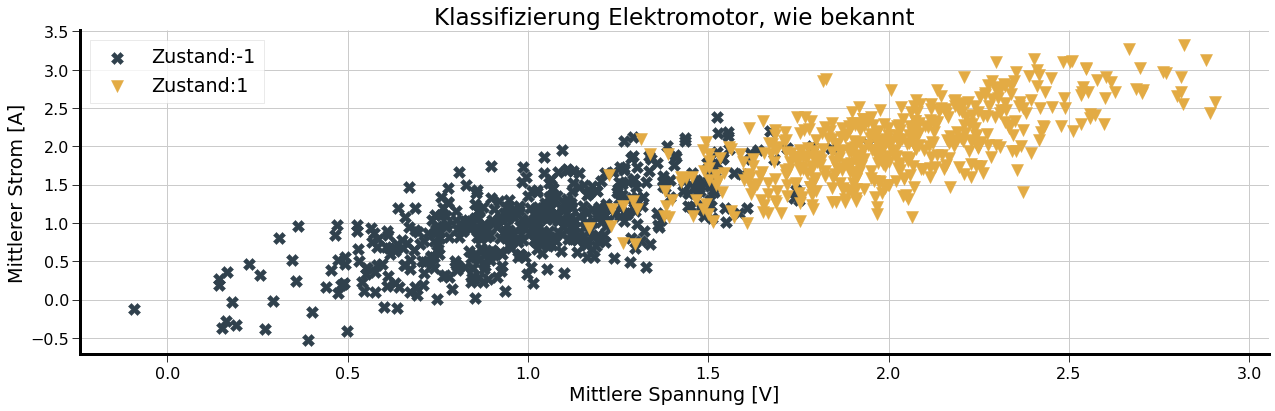

In [5]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

ax.legend()

plt.title('Klassifizierung Elektromotor, wie bekannt')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.tight_layout()
plt.show()


In [6]:
n1, n2, dim = 50,50, 2
np.random.seed(42)
C = np.array([[0., -0.23], [0.5, .23]])
X = np.r_[np.dot(np.random.randn(n1, dim), C) + np.array([1, 1]),
          np.dot(np.random.randn(n2, dim), C) + np.array([4, 3])]
y = np.hstack((np.ones(n1), np.ones(n2)*-1))
df = pd.DataFrame({'Strom':X[:,0],'Spannung':X[:,1], 'Zustand':y})
df_elektro = df.copy()

# Maximum Margin Classifier: Lineare Separation

* Für den Anfang erleichtern wir uns das Leben und separieren die Daten etwas weiter.
* Offensichtlich können die beiden Klassen mit einer Geraden unterschieden werden.
* Die Zugehörigkeit zu einer Klasse ergibt sich aus der Seite auf der ein Punkt liegt.
* (Beliebig viele) Verschiedene Geraden können die Klassen trennen.

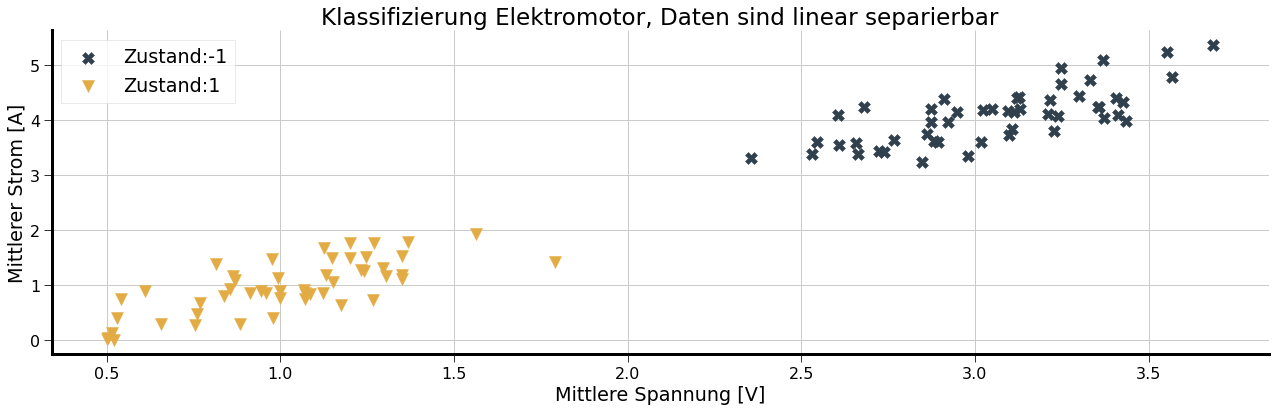

In [7]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

ax.legend()

plt.title('Klassifizierung Elektromotor, Daten sind linear separierbar')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.tight_layout()
plt.show()


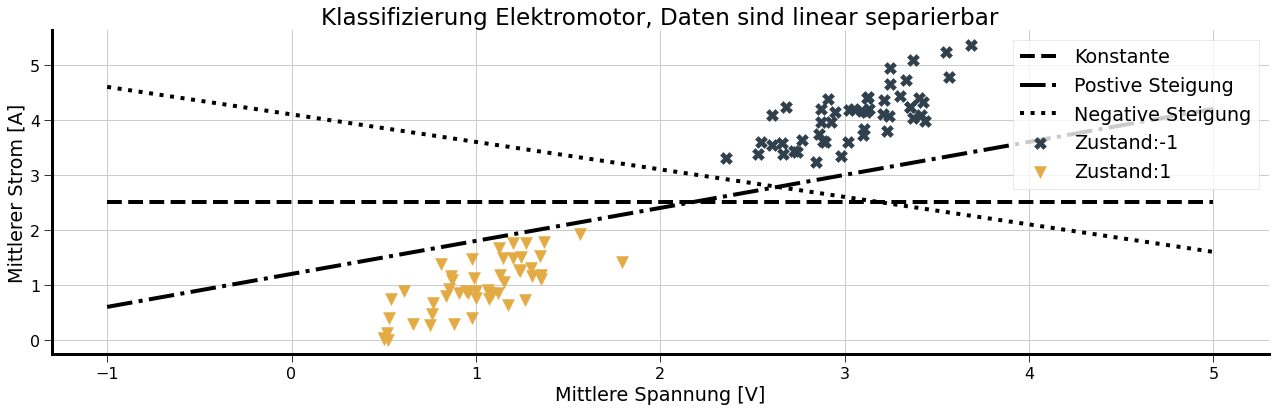

In [8]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

# Gerade Linie durch 2
x_1 = np.linspace(-1, 5)
beta_0_over_beta2 = -2.5
beta_1_over_beta2 = 0.
x_2 = - beta_0_over_beta2 - beta_1_over_beta2 * x_1
ax.plot(x_1, x_2, '--', c = 'k', label='Konstante')


# Line mit postiver Steigung
x_1 = np.linspace(-1, 5)
beta_0_over_beta2 = -1.2
beta_1_over_beta2 = -.6
x_2 = - beta_0_over_beta2 - beta_1_over_beta2 * x_1
ax.plot(x_1, x_2, '-.', c = 'k', label='Postive Steigung')

# Linie mit negativer Steigung
x_1 = np.linspace(-1, 5)
beta_0_over_beta2 = -4.1
beta_1_over_beta2 = .5
x_2 = - beta_0_over_beta2 - beta_1_over_beta2 * x_1
ax.plot(x_1, x_2, ':', c = 'k', label='Negative Steigung')


for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

ax.legend()

plt.title('Klassifizierung Elektromotor, Daten sind linear separierbar')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.tight_layout()
plt.show()


# Definition Hyperebene

<center><img style="float: right;" src="img/svm_hyper.png" width=30% class="stretch"></center>

* Die Gerade, die unsere Punkte trennt nennen wir eine *Hyperebene*.
* Unser **Raum** hat $p$ Dimensionen, z.B. Strom & Spannung.

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$$
* Im 2-Dimensionalen Raum ist die Gerade eine Hyperebene.

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 = 0$$
* Im 3-Dimensionalen Raum ist die Ebene eine Hyperebene.

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p = 0$$
* Eine Hyperebene ist ein flaches Element mit $p-1$ Dimensionen.

# Klassifizierung mittels Hyperebene

<center><img src="img/tafel_ebene.png" width=30% class="stretch"></center>

* Für jeden Punkt auf der Hyperebene gilt:
$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p = 0$$

* Für jeden Punkt der Klasse 1 gilt:
$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p > 0$$

* Für jeden Punkt der Klasse -1 gilt:
$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p < 0$$



* Daraus können wir folgen:
$$\hat{f}(x) = sign(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p)$$


# Beispiel Hyperebenen

* Wieder gilt: Beliebig viele Trenner/Hyperebenen existieren.
* Für uns ist noch die Frage zu beantworten, welcher Trenner ein Guter ist?

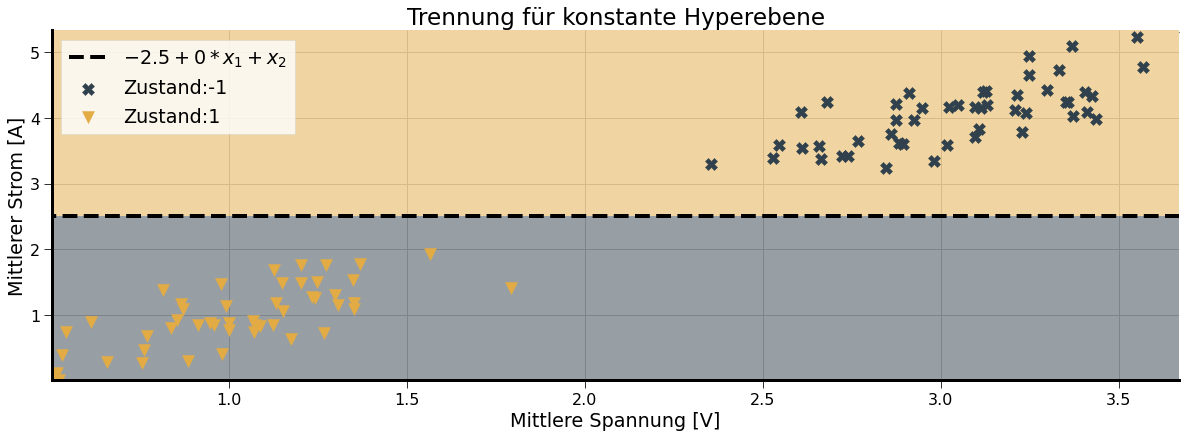

In [9]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 200  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = np.sign(-2.5 + yy)#estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Gerade Linie durch 2
x_1 = np.linspace(-1, 5)
beta_0_over_beta2 = -2.5
beta_1_over_beta2 = 0.
x_2 = - beta_0_over_beta2 - beta_1_over_beta2 * x_1
ax.plot(x_1, x_2, '--', c = 'k', label='$-2.5+0*x_1+x_2$')

# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

plt.title('Trennung für konstante Hyperebene')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.legend()
plt.show()

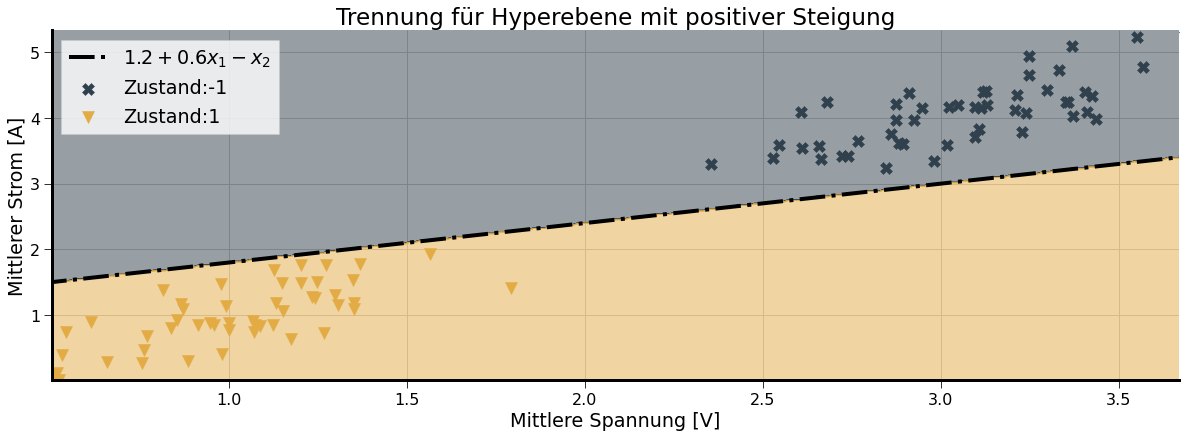

In [10]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 200  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = np.sign((1.2+0.6*xx-yy))#estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)


# Line mit postiver Steigung
x_1 = np.linspace(-1, 5)
beta_0_over_beta2 = -1.2
beta_1_over_beta2 = -.6
x_2 = - beta_0_over_beta2 - beta_1_over_beta2 * x_1
ax.plot(x_1, x_2, '-.', c = 'k', label='$1.2+0.6x_1-x_2$')

# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

plt.title('Trennung für Hyperebene mit positiver Steigung')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.legend()
plt.show()

# Neue Beobachtung

* Wir fügen einen neuen Punkt bei 3V und 1A ein
$$\hat{f}(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$
$$\hat{f}(x) = 1.2 + 0.6  \cdot  3 - 1  \cdot 1$$
$$\hat{f}(x) = 2$$
$$sign(\hat{f}(x)) = 1$$



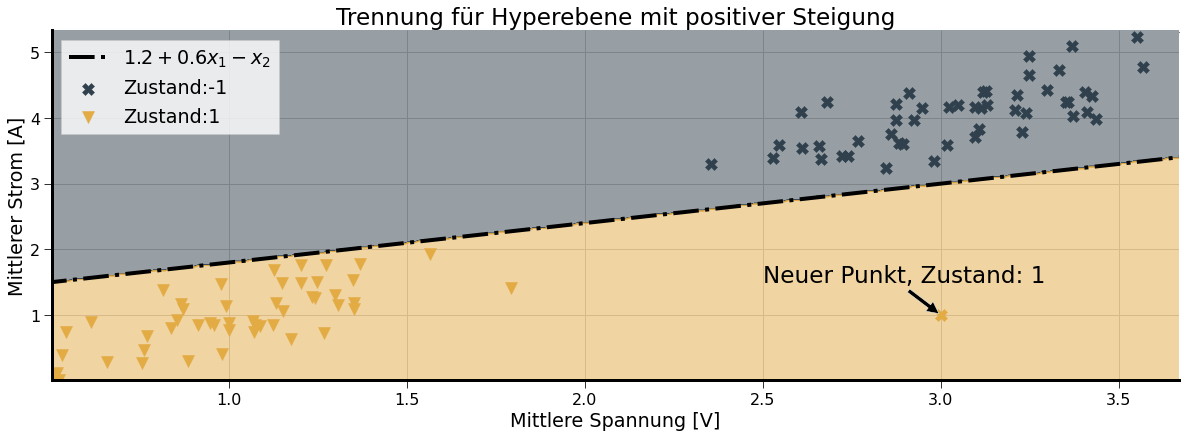

In [11]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 200  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = np.sign((1.2+0.6*xx-yy))#estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)


# Line mit postiver Steigung
x_1 = np.linspace(-1, 5)
beta_0_over_beta2 = -1.2
beta_1_over_beta2 = -.6
x_2 = - beta_0_over_beta2 - beta_1_over_beta2 * x_1
ax.plot(x_1, x_2, '-.', c = 'k', label='$1.2+0.6x_1-x_2$')



# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

    
# Plotte den neuen Punkt
plt.scatter(3., 1., marker=filled_markers[-1], c=orange)
ax.annotate('Neuer Punkt, Zustand: 1', xy=(3, 1), xytext=(2.5, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize='x-large'
            )
    
plt.title('Trennung für Hyperebene mit positiver Steigung')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.legend()
plt.show()



# Neue Beobachtung

* Wir fügen einen neuen Punkt bei 0.8V und 1.8A ein
$$\hat{f}(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$
$$\hat{f}(x) = 1.2 + 0.6  \cdot  1.8 - 1  \cdot 0.8$$
$$\hat{f}(x) = -0.12$$
$$sign(\hat{f}(x)) = -1$$



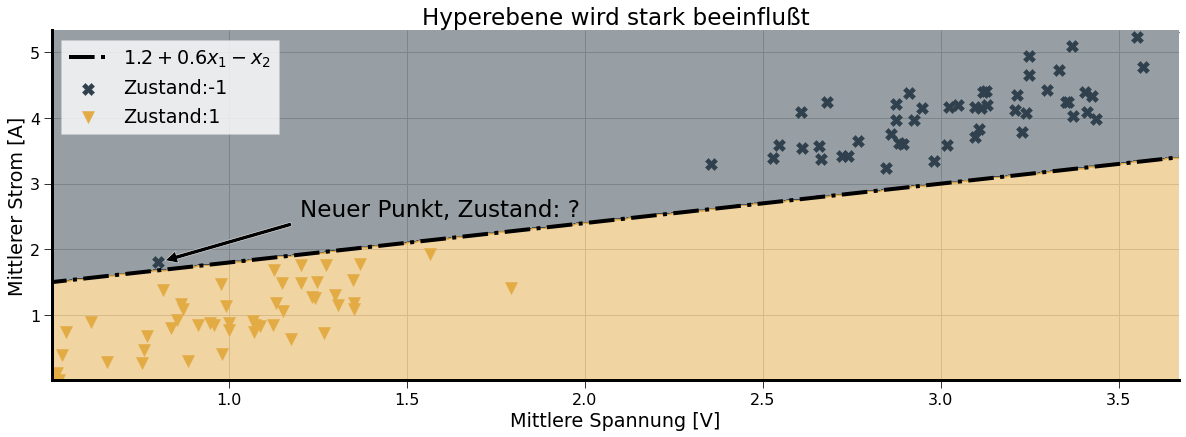

In [12]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 200  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = np.sign((1.2+0.6*xx-yy))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)


# Line mit postiver Steigung
x_1 = np.linspace(-1, 5)
beta_0_over_beta2 = -1.2
beta_1_over_beta2 = -.6
x_2 = - beta_0_over_beta2 - beta_1_over_beta2 * x_1
ax.plot(x_1, x_2, '-.', c = 'k', label='$1.2+0.6x_1-x_2$')



# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

    
# Plotte den neuen Punkt
plt.scatter(.8, 1.8, marker=filled_markers[-1], c=blue)
ax.annotate('Neuer Punkt, Zustand: ?', xy=(0.8, 1.8), xytext=(1.2, 2.5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize='x-large'
            )
    
plt.title('Hyperebene wird stark beeinflußt')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.legend()
plt.show()



In [13]:
from sklearn.svm import LinearSVC, SVC
clf = SVC(random_state=0, tol=1e-5, kernel='linear')
clf.fit(df[['Spannung', 'Strom']], df['Zustand'])

SVC(kernel='linear', random_state=0, tol=1e-05)

# Die *beste* Hyperebene

* Wir suchen einen Trenner, der robust gegenüber neuen Datenpunkten ist.
* Rechts und Links der Hyperebene führen wir eine **Margin** ein.
* Wir können uns die SVM als eine Straße mit zwei Spuren vorstellen...
* Wir versuchen die Breite der Straße zu maximieren.

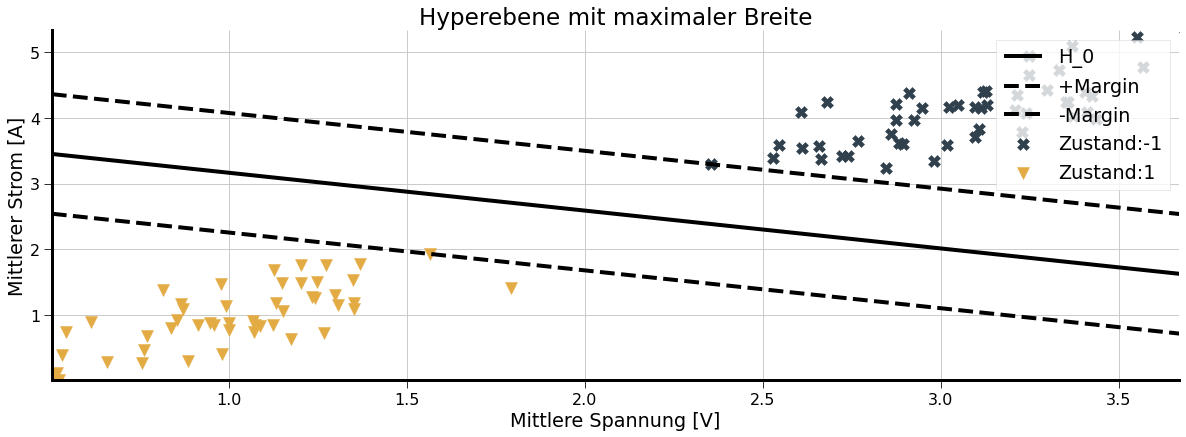

In [14]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 200  # step size in the mesh

x_range = np.linspace(x_min, x_max)
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range, c='k', label='H_0')
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range+0.91, '--', c='k', label='+Margin')
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range-0.91, '--', c='k', label='-Margin')

# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))
    
plt.title('Hyperebene mit maximaler Breite')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.legend(loc=1)
plt.show()



# Optimierung der Hyperebene

* Es wurde bereits definiert:

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p > 0 \;\text{wenn}\; y_i=1$$
$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p < 0 \;\text{wenn}\; y_i=-1$$

* Vereinfacht sich zu: 

$$y_i(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p) > 0 $$

* Desto weiter ein Punkt von 0 entfernt ist, desto mehr vertrauen wir dem Resultat unserer Berechnung.


# Optimierung der Hyperebene

* Wir passen unser Gleichung an und ergänzen $M$:

$$y_i(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p) \ge M $$

* Dann folgt daraus unser Optimierungsproblem. Passe alle $\beta$ an, so dass die *Straße* eine maximale Breite erreicht. 

$$\max_{\beta_0, \beta_1, \dots, \beta_p} M$$

* Für die Umsetzung benötigen wir hier Support Vektoren


# Support Vektor Maschine in Python

In [15]:
from sklearn.svm import SVC
clf = SVC(random_state=42, kernel='linear')
clf.fit(df[['Spannung', 'Strom']], df['Zustand'])

SVC(kernel='linear', random_state=42)

In [16]:
clf.coef_, clf.intercept_
print('Die Hyperebene hat die Form: %.2f + %.2f X1 + %.2f X2'%(clf.intercept_, clf.coef_[0][0], clf.coef_[0][1])  )

Die Hyperebene hat die Form: 4.09 + -0.63 X1 + -1.09 X2


In [17]:
clf.support_vectors_

array([[2.35493156, 3.29907447],
       [1.5644165 , 1.92613909]])

# Support Vectors

<center><img style="float: right;" src="img/svm_sv.png" width=30% class="stretch"></center>

* Die Support Vektors stützen die Hyperebene.
* Sie liegen auf der Margin (für den linear separierbaren Fall).
* Alle anderen Trainingspunkte beeinflußen das Ergebnis nicht.

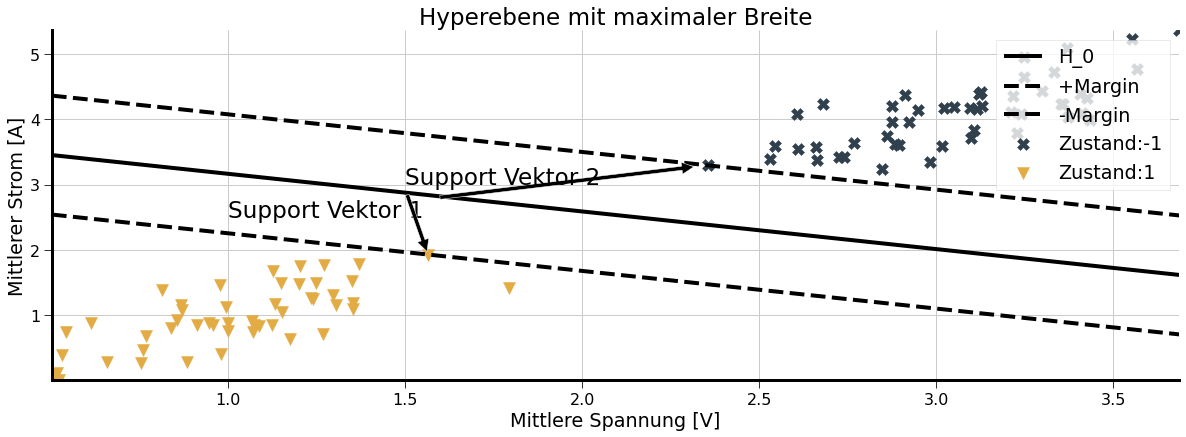

In [18]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 200  # step size in the mesh

x_range = np.linspace(x_min, x_max)
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range, c='k', label='H_0')
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range+0.91, '--', c='k', label='+Margin')
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range-0.91, '--', c='k', label='-Margin')

# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

ax.annotate('Support Vektor 1', xy=(clf.support_vectors_[0][0], clf.support_vectors_[0][1]), xytext=(1., 2.5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize='x-large')

ax.annotate('Support Vektor 2', xy=(clf.support_vectors_[1][0], clf.support_vectors_[1][1]), xytext=(1.5, 3.),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize='x-large')

    
plt.title('Hyperebene mit maximaler Breite')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.legend(loc=1)
plt.show()



In [19]:
n1, n2, n3, dim = 50,50, 50, 2
np.random.seed(42)
C = np.array([[0., -0.23], [0.5, .23]])
X = np.r_[np.dot(np.random.randn(n1, dim), C) + np.array([1, 1]),
          np.dot(np.random.randn(n2, dim), C) + np.array([4, 3]),
          np.dot(np.random.randn(n2, dim), C) + np.array([5, 5])]
y = np.hstack((np.ones(n1), np.ones(n2)*-1, np.ones(n3)*-1))
df = pd.DataFrame({'Strom':X[:,0],'Spannung':X[:,1], 'Zustand':y})
df_elektro = df.copy()

# Support Vektoren

* Das untere Beispiel verdeutlicht den Effekt.
* Obwohl wir den Datensatz stark manipuliert haben, bleibt der Trenner robust
    * Andere Klassenverteilung
    * Andere Verteilung der Daten 

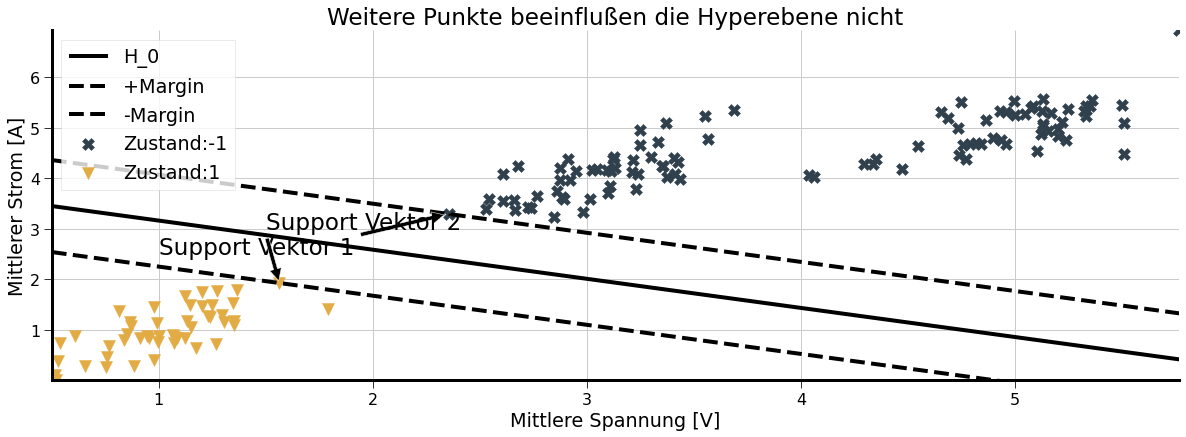

In [20]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 200  # step size in the mesh

x_range = np.linspace(x_min, x_max)
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range, c='k', label='H_0')
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range+0.91, '--', c='k', label='+Margin')
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range-0.91, '--', c='k', label='-Margin')

# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

ax.annotate('Support Vektor 1', xy=(clf.support_vectors_[0][0], clf.support_vectors_[0][1]), xytext=(1., 2.5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize='x-large')

ax.annotate('Support Vektor 2', xy=(clf.support_vectors_[1][0], clf.support_vectors_[1][1]), xytext=(1.5, 3.),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize='x-large')

    
plt.title('Weitere Punkte beeinflußen die Hyperebene nicht')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.legend()
plt.show()



In [21]:
n1, n2, dim = 50,50, 2
np.random.seed(42)
C = np.array([[0., -0.23], [0.5, .23]])
X = np.r_[np.dot(np.random.randn(n1, dim), C) + np.array([1, 1]),
          np.dot(np.random.randn(n2, dim), C) + np.array([4, 3])]
y = np.hstack((np.ones(n1)*-1, np.ones(n2)))
df = pd.DataFrame({'Strom':X[:,0],'Spannung':X[:,1], 'Zustand':y})
df_elektro = df.copy()

# Support Vector Classifier

* Wie gehen wir mit einem Punkt auf der falschen Seite um?
* Wann stößt der bisherige Ansatz an seine Grenzen?

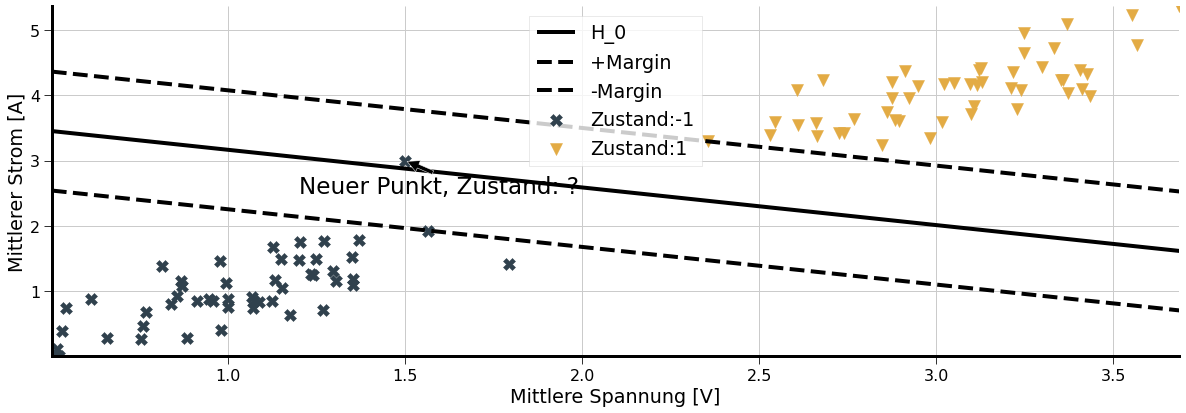

In [22]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 200  # step size in the mesh

x_range = np.linspace(x_min, x_max)
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range, c='k', label='H_0')
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range+0.91, '--', c='k', label='+Margin')
ax.plot(x_range, -clf.intercept_/clf.coef_[0][1]-clf.coef_[0][0]/clf.coef_[0][1]*x_range-0.91, '--', c='k', label='-Margin')

# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))


# Plotte den neuen Punkt
plt.scatter(1.5, 3, marker=filled_markers[-1], c=blue)
ax.annotate('Neuer Punkt, Zustand: ?', xy=(1.5, 3.), xytext=(1.2, 2.5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize='x-large'
            )

    
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.legend()
plt.show()



In [23]:
n1, n2, dim = 500,500, 2
np.random.seed(0)
C = np.array([[0.5, -0.23], [0.5, .23]])
X = np.r_[np.dot(np.random.randn(n1, dim), C) + np.array([1, 1]),
          np.dot(np.random.randn(n2, dim), C) + np.array([1, 2.8])]
y = np.hstack((np.ones(n1)*-1, np.ones(n2)))
df = pd.DataFrame({'Strom':X[:,0],'Spannung':X[:,1], 'Zustand':y})
df_elektro = df.copy()

# Herleitung der Zielfunktion für die lineare SVM

* Die Hyperplane in einem n-dimensionalen Raum kann durch die Gleichung beschrieben werden:
$$ w \cdot x + b = 0 $$

* Für die Klassifikation gilt:
$$ y_i (w \cdot x_i + b) \geq 1 $$
wobei $ y_i \in \{-1, 1\} $ die Klassenzugehörigkeit der Datenpunkte $ x_i $ ist.

* Die Margin ist der Abstand zwischen den nächsten Punkten der beiden Klassen zur Hyperplane. Wir wollen diesen Abstand maximieren.




* Der Abstand eines Punktes $ x_i $ zur Hyperplane ist:
$$ \frac{|w \cdot x_i + b|}{\|w\|} $$

* Für die Support-Vektoren, also die Punkte, die direkt an der Margin liegen, gilt:
$$ y_i (w \cdot x_i + b) = 1 $$

* Um die Margin zu maximieren, müssen wir den Abstand $ \frac{1}{\|w\|} $ maximieren, was äquivalent dazu ist, $ \|w\| $ zu minimieren. Dies führt uns zur Minimierung von $ \frac{1}{2} \|w\|^2 $.


# Beispiel zur Veranschaulichung

Betrachten wir ein einfaches Beispiel in zwei Dimensionen:

- Die Hyperplane sei definiert durch $ 2x_1 + 3x_2 - 6 = 0 $.
- Der Gewichtungsvektor ist $ w = [2, 3] $.
- Der Punkt $ x_0 = [1, 2] $ befindet sich nicht auf der Hyperplane.

Der Abstand des Punktes $ x_0 $ zur Hyperplane wird berechnet als:

1. **Berechnung des Werts der linearen Funktion an $ x_0 $:**
   $$
   w \cdot x_0 + b = 2 \cdot 1 + 3 \cdot 2 - 6 = 2 + 6 - 6 = 2
   $$

2. **Berechnung der Norm des Gewichtungsvektors:**
   $$
   \|w\| = \sqrt{2^2 + 3^2} = \sqrt{4 + 9} = \sqrt{13}
   $$

3. **Berechnung des Abstands:**
   $$
   \frac{|2|}{\sqrt{13}} = \frac{2}{\sqrt{13}}
   $$

Dies ist der senkrechte Abstand des Punktes $ x_0 $ zur Hyperplane.

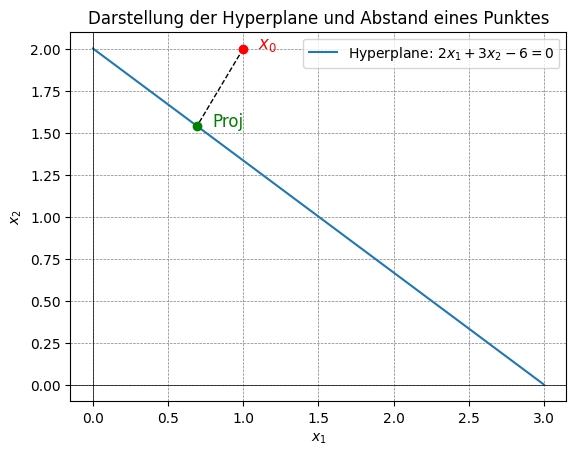

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definition der Hyperplane
w = np.array([2, 3])
b = -6

# Definition des Punktes
x0 = np.array([1, 2])

# Berechnung des Abstandes
distance = abs(np.dot(w, x0) + b) / np.linalg.norm(w)

# Erzeugen der Hyperplane
x = np.linspace(0, 3, 100)
y = (-w[0] * x - b) / w[1]

# Plotten der Hyperplane
plt.plot(x, y, label='Hyperplane: $2x_1 + 3x_2 - 6 = 0$')

# Plotten des Punktes
plt.scatter(x0[0], x0[1], color='red', zorder=5)
plt.text(x0[0] + 0.1, x0[1], '$x_0$', fontsize=12, color='red')

# Plotten der Projektion des Punktes auf die Hyperplane
projection = (np.dot(w, x0) + b) / np.dot(w, w) * w
proj_point = x0 - projection
plt.scatter(proj_point[0], proj_point[1], color='green', zorder=5)
plt.text(proj_point[0] + 0.1, proj_point[1], 'Proj', fontsize=12, color='green')

# Zeichnen der Linie vom Punkt zur Hyperplane
plt.plot([x0[0], proj_point[0]], [x0[1], proj_point[1]], 'k--', linewidth=1)

# Achsen und Beschriftungen
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Darstellung der Hyperplane und Abstand eines Punktes')

# Anzeigen des Plots
plt.show()


# Limitation Maximum Margin Classifier

* Ggfs. gibt es Punkte, die unser Ergebnis sehr stark beeinflußen.
* Sehr wahrscheinlich sind unsere Daten nicht linear unterscheidbar.
* Wir müssen daher damit umgehen, dass Daten auf der falschen Seite der Margin, bzw. der Hyperebene liegen.

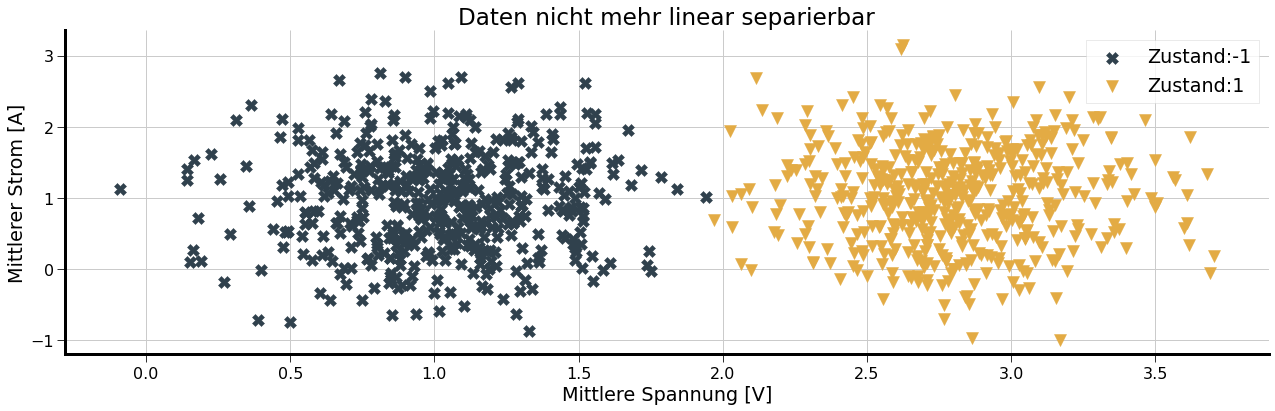

In [24]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

ax.legend()

plt.title('Daten nicht mehr linear separierbar')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
plt.tight_layout()
plt.show()


# Schlupfvariable

<center><img src="img/svm_eps.png" width=30% class="stretch"></center>


* Schlupfvariablen helfen bei der Lösung eines Optimierungsproblem. Ihr Wert ist nicht weiter relevant.
* Wir führen hier für jeden Trainingspunkt den Wert $\epsilon_i$ ein. 
    * $\epsilon_i$ ist größer 0, wenn die Margin verletzt wird.
    * $\epsilon_i$ ist größer 1, wenn die Hyperebene verletzt wird.

# Optimierung II


* Um Fehlklassifikationen zu ermöglichen und sie zu kontrollieren, führen wir Schlupfvariablen $ \xi_i $ ein. Die optimierte Bedingung lautet dann:

$$ y_i (w \cdot x_i + b) \geq 1 - \xi_i $$

mit $ \xi_i \geq 0 $.






* Die Gesamtsumme der Schlupfvariablen $ \sum_{i=1}^{n} \xi_i $ soll minimiert werden, um die Fehlklassifikationen zu kontrollieren.

* Der Parameter $ C $ wird eingeführt, um den Trade-off zwischen der Maximierung der Margin und der Minimierung der Fehlklassifikationen zu kontrollieren. Die Zielfunktion lautet dann:

$$ \min_{w, b, \xi} \left( \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i \right) $$


* Die Nebenbedingungen für die Optimierung lauten:
$$ y_i (w \cdot x_i + b) \geq 1 - \xi_i \quad \text{für alle} \; i $$
$$ \xi_i \geq 0 \quad \text{für alle} \; i $$


# C ist *compliziert*

$$ \min_{w, b, \xi} \left( \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i \right) $$

* Ein kleines C: 
    * Es dürfen mehr Punkte die Margin verletzen. 
    * Breitere Margin
    * Da die Margin größer ist, werden mehr Support Vectors benötigt.
* Ein großes C
    * Es dürfen weniger Punkte die Margin verletzen.
    * Kleinere Margin
    * Weniger Support Vectors
    
* Das richtige C zu finden, ist in der Regel nur mit Hyper-Parameter Tuning möglich.

* **Führt ein großes C zu Overfitting oder Underfitting?**

# Sehr großes C mit nicht-linearer SVM

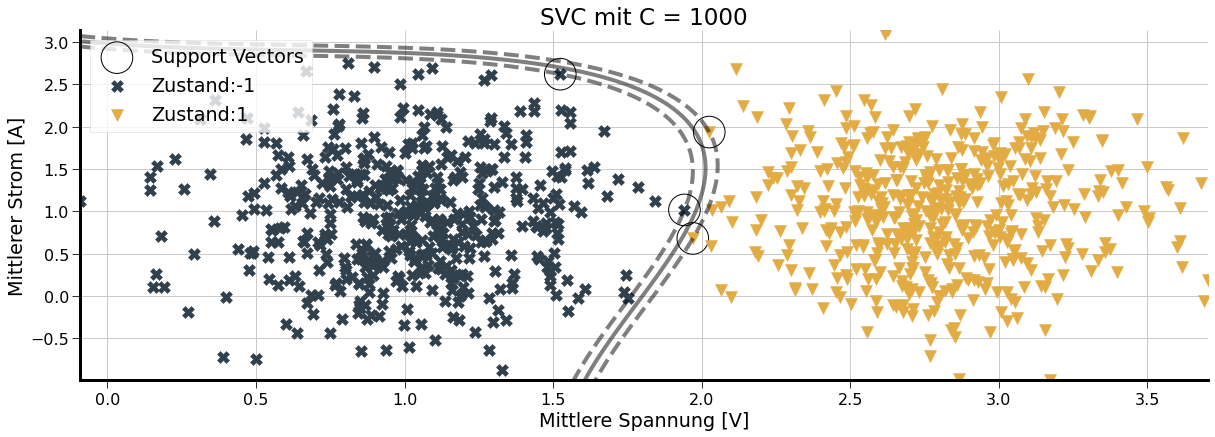

In [29]:
from sklearn.svm import LinearSVC, SVC
clf = SVC(random_state=0, tol=1e-5, kernel='poly', C=1000)
clf.fit(df[['Spannung', 'Strom']].values, df['Zustand'])

# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 400  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)

# Put the result into a color plot
#plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1000,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')


# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

        
plt.title('SVC mit C = 1000')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
#plt.xlim(1, 2)
plt.ylim(yy.min(), yy.max())
ax.legend()
plt.show()



# Sehr kleines C mit nicht-linearer SVM

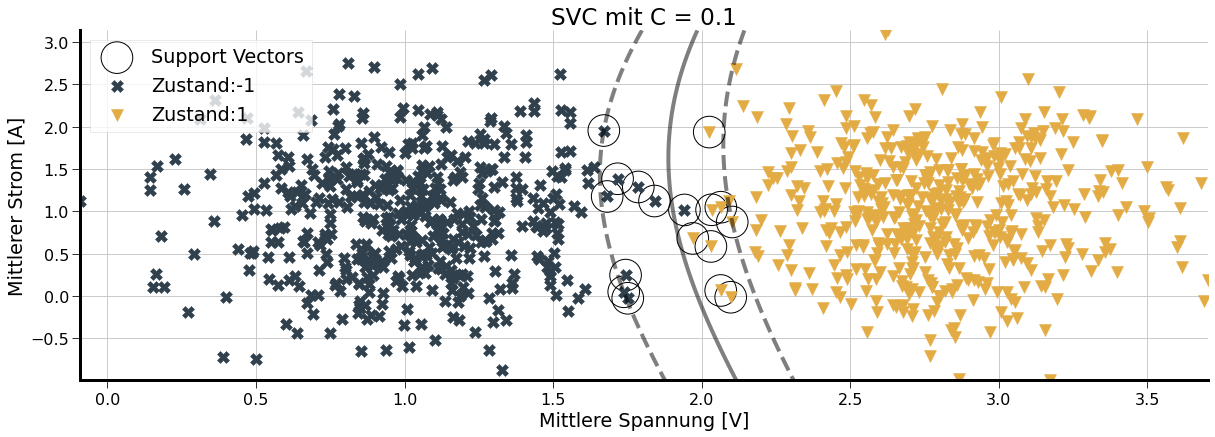

In [30]:
from sklearn.svm import LinearSVC, SVC
clf = SVC(random_state=0, tol=1e-5, kernel='poly', C=0.1)
clf.fit(df[['Spannung', 'Strom']].values, df['Zustand'])

# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['Spannung'].min(), df['Spannung'].max()
y_min, y_max = df['Strom'].min(), df['Strom'].max()
n = 400  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)

# Put the result into a color plot
#plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1000,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')


# Plot also the training points
for i in [-1, 1]:
    plt.scatter(df[df['Zustand'] == i].Spannung, df[df['Zustand'] == i].Strom, marker=filled_markers[i], label='Zustand:' + str(i))

        
plt.title('SVC mit C = 0.1')
plt.ylabel('Mittlerer Strom [A]')
plt.xlabel('Mittlere Spannung [V]')
#plt.xlim(1, 2)
plt.ylim(yy.min(), yy.max())
ax.legend()
plt.show()



# Kernel Trick

# Was wir bisher erreicht haben: 

* Prinzip der SVM durch den maximal breitesten Trenner erklärt.
* Durch $C$ und $\epsilon$ eine Lösung für linear nicht separierbare Daten gefunden.
* Wir sind aber weiter an eine lineare Annahme gebunden.
* Wie könnte ein guter Trenner für das Mondbeispiel aussehen?

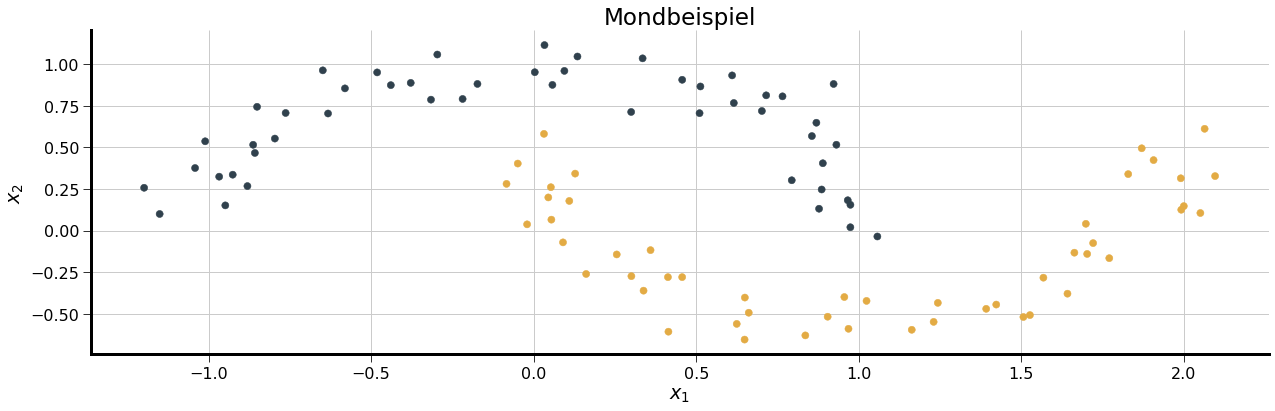

In [31]:
from sklearn.datasets import make_moons

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

X, y = make_moons(100,  noise=.1)
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1], 'Zustand':y})

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap_kiel2)

plt.title('Mondbeispiel')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.tight_layout()
plt.show()

# Umgang mit linearen Modellen

* Wir denken zurück an die lineare Regression. Hier konnten Sie eine Transformation durchführen, um auch nicht-lineare Zusammenhänge zu untersuchen.
* Bei vielen Parameter kann das sehr schnell unhandlich werden.
* Die SVM kennt hier bereits ein paar Tricks, die wir noch weiter untersuchen werden.

In [32]:
from sklearn.svm import LinearSVC, SVC
clf = SVC(random_state=0, tol=1e-5, kernel='poly', degree=5, coef0=1, gamma='auto')
clf.fit(df[['X1', 'X2']].values, df['Zustand']);

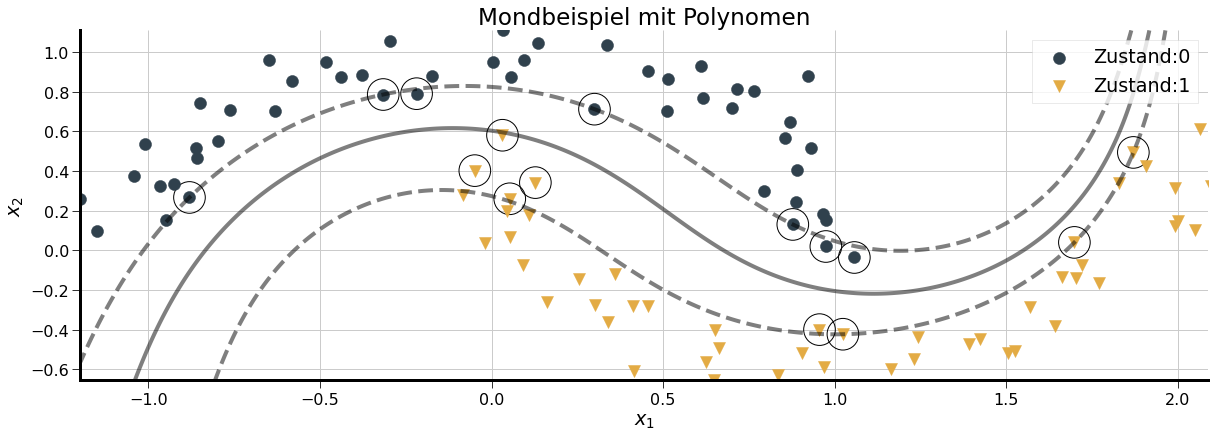

In [33]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['X1'].min(), df['X1'].max()
y_min, y_max = df['X2'].min(), df['X2'].max()
n = 400  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)

# Put the result into a color plot
#plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1000,
           linewidth=1, facecolors='none', edgecolors='k')


# Plot also the training points
for i in range(2):
    plt.scatter(df[df['Zustand'] == i].X1, df[df['Zustand'] == i].X2, marker=filled_markers[i], label='Zustand:' + str(i))

        
plt.title('Mondbeispiel mit Polynomen')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.legend()
plt.show()



# Transformation in einen höher-dimensionalen Raum

<center><img src="img/tafel_trans.png" width=30% class="stretch"></center>

* Die Grundidee ist es die Daten mittels Transformationen zu beschreiben: $x \rightarrow x, x^2$
* Diese Transformation ermöglicht es deutlich einfacher eine trennende Hyperebene zu finden. 
* Zunächst soll das Wirkprinzip anhand eines Beispiels besprochen. Dies resultiert in erster Linie aber in einem erhöhten Rechenaufwand, da mehr Dimensionen beschrieben werden müssen. 
* Die SVM bedient sich des Kerneltricks, um diesen Anstieg: 
    * recht gering zu halten
    * und die Transformation in das Modell zu ziehen. 

# Kreisbeispiel

* Offensichtlich kommen wir hier mit einer linearen Annahme nicht weiter.
* Entscheidungsbäume könnten zumindest ein Rechteck *einfügen*.
* Uns bleibt lediglich die Möglichkeit eine Hilfsdimension einzuführen.
* Ähnlich haben wir bereits die Lineare Regression unterstützt $T_0=\sqrt{\frac{l}{g}}$

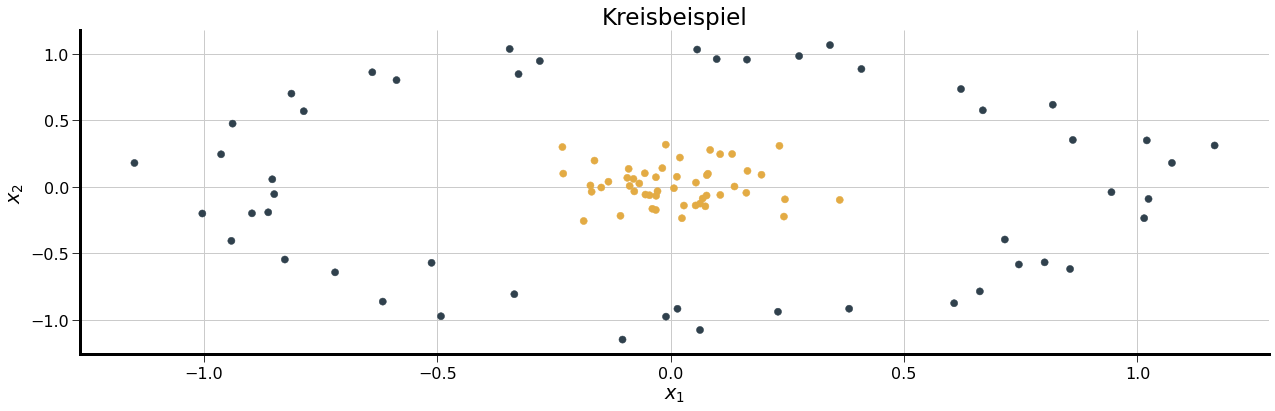

In [34]:
from sklearn.datasets import make_circles

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap_kiel2)

plt.title('Kreisbeispiel')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.tight_layout()
plt.show()

# Radial Basis Function

$$RBF(x) = e^{-x^2} $$

* RBF nennen wir die *gaußsche Radiale Basis Funktion*.
* Der Wert der Funktion hängt lediglich vom Abstand zum Zentrum ab.
* Ähnlich wie Polynome ermöglichen Sie eine zusätzliche Dimension, um lineare Separation zu ermöglichen.
* Die Entscheidungsfläche bleibt dabei stets linear, nur die Projektion ist nicht mehr linear.

In [35]:
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1], 'Zustand':y})
df['R'] = np.exp(-(df['X1'])**2)+np.exp(-(df['X2'])**2)

In [36]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
def plot_3D(elev=30, azim=30, X=X, y=y):
    fig = plt.figure(figsize=half_plot_size)

    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], df['R'], c=y, s=50, cmap=cmap_kiel2)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('R')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180),
         X=fixed(X), y=fixed(y));



interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

# Kernel Trick

* Das erstellen neuer Parameter, z.B. $x_1^2$ oder $R$ ermöglicht die Betrachtung in anderen Dimensionen.
* In der Praxis ist dies sehr rechenaufwendig und potentiell unmöglich.
* Während der Optimierung der SVM besteht die Möglichkeit dieses Problem zu umgehen.

* Wir definieren das Skalarprodukt zweiter Vektoren als:

$$ \langle x_i, x_{i^´}\rangle = \sum_{j=1}^p x_{ij} x_{i^´j} $$

* Nach viel Optimierung und Formatierung, die hier hier ignorieren, wird die SVM zu:

$$ f(x) =  \beta_0 + \sum_{i=1}^n \alpha_i\langle x_i, x_{i^´}\rangle \tag{1}$$

* D.h. für jeden neuen Punkte $x$ muss $(1)$ ausgewertet werden. 
    * In der Tat ist $\alpha_i$ lediglich für Support Vektoren ungleich null. 
    * Das Produkt $\langle x_i, x_{i^´}\rangle$ lässt sich daher verhältnismäßig günstig austauschen. 
    


# Kernel Trick

* Wir führen einen Kernel ein, der das Skalarprodukt ersetzt:

$$ K(x_i,  x_{i^´}) = \sum_{j=1}^p x_{ij} x_{i^´j} $$

* Oder als Polynom:

$$ K(x_i,  x_{i^´}) = (1+\sum_{j=1}^p x_{ij} x_{i^´j})^d $$

* Oder Radial:

$$ K(x_i,  x_{i^´}) = exp(-\gamma \sum_{j=1}^p (x_{ij} - x_{i^´j})^2)$$

# Radiale Basis Funktion in der SVM

In [37]:
from sklearn.svm import LinearSVC, SVC
clf = SVC(random_state=0, tol=1e-5, kernel='rbf', gamma=1, C=1)
clf.fit(df[['X1', 'X2']].values, df['Zustand']);

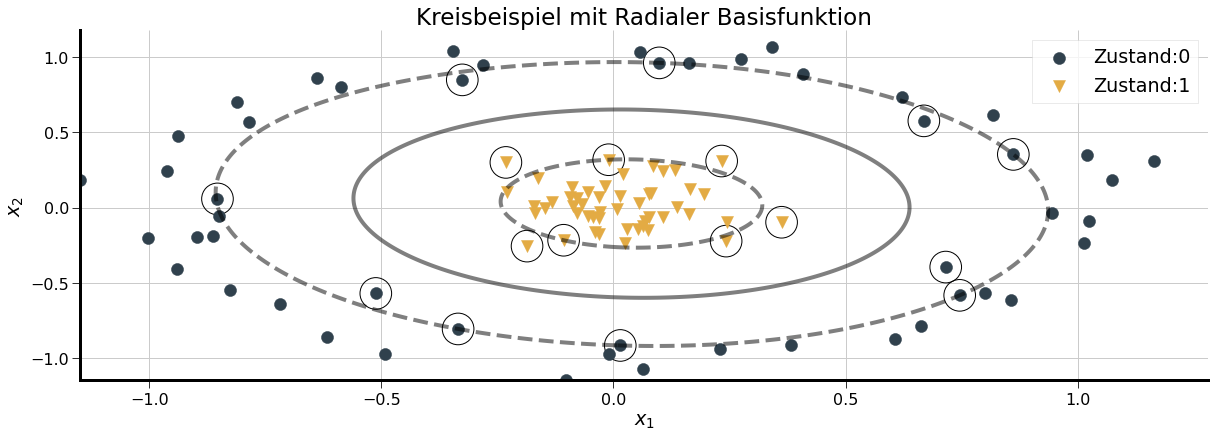

In [38]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['X1'].min(), df['X1'].max()
y_min, y_max = df['X2'].min(), df['X2'].max()
n = 400  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)

# Put the result into a color plot
#plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1000,
           linewidth=1, facecolors='none', edgecolors='k')


# Plot also the training points
for i in range(2):
    plt.scatter(df[df['Zustand'] == i].X1, df[df['Zustand'] == i].X2, marker=filled_markers[i], label='Zustand:' + str(i))

        
plt.title('Kreisbeispiel mit Radialer Basisfunktion')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')

ax.legend()
plt.show()



# Steckbrief SVM

<center><img src="img/steckbrief_svm.png" width=80% class="stretch"></center>


# Wie funktionieren Support Vector Machines?

A) Sie erstellen eine Grenze, die Datenpunkte in verschiedene Klassen trennt, basierend auf Ähnlichkeit

B) Sie erstellen Gruppen von ähnlichen Datenpunkten, ohne zuvor definierte Klassen zu verwenden

C) Sie prognostizieren zukünftige Werte basierend auf historischen Daten

D) Sie visualisieren Daten in grafischer Form



# Was bezeichnet man als "Hyperplane" in einem SVM-Modell?

A) Der Punkt in dem SVM-Modell, an dem das Training beginnt.

B) Eine Entscheidungsgrenze, die verschiedene Klassen in einem SVM-Modell trennt.

C) Die Methode, mit der ein SVM-Modell trainiert wird.

D) Der Bereich im SVM-Modell, der am empfindlichsten für Overfitting ist.

# Was sind "Support Vectors" in einem SVM-Modell?

A) Die Punkte, die am nächsten an der Hyperplane liegen.

B) Die Punkte, die am weitesten von der Hyperplane entfernt sind.

C) Die Punkte, die genau auf der Hyperplane liegen.

D) Die Punkte, die die Hyperplane durchqueren.

# Was ist der Kernel-Trick in SVMs?

A) Eine Methode zur Erhöhung der Geschwindigkeit des Modelltrainings.

B) Eine Methode, um Daten in eine höhere Dimension zu projizieren, um eine Trennung zu ermöglichen.

C) Eine Methode zur Reduzierung der Anzahl der Features.

D) Eine Methode zur Verbesserung der Datenvisualisierung.